# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

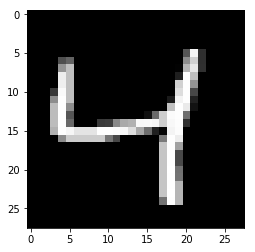

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [25]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name="targets")

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [26]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [29]:
epochs = 50
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/50... Training loss: 0.6942
Epoch: 1/50... Training loss: 0.6907
Epoch: 1/50... Training loss: 0.6869
Epoch: 1/50... Training loss: 0.6830
Epoch: 1/50... Training loss: 0.6781
Epoch: 1/50... Training loss: 0.6722
Epoch: 1/50... Training loss: 0.6644
Epoch: 1/50... Training loss: 0.6565
Epoch: 1/50... Training loss: 0.6469
Epoch: 1/50... Training loss: 0.6360
Epoch: 1/50... Training loss: 0.6220
Epoch: 1/50... Training loss: 0.6110
Epoch: 1/50... Training loss: 0.5950
Epoch: 1/50... Training loss: 0.5781
Epoch: 1/50... Training loss: 0.5649
Epoch: 1/50... Training loss: 0.5459
Epoch: 1/50... Training loss: 0.5292
Epoch: 1/50... Training loss: 0.5073
Epoch: 1/50... Training loss: 0.4957
Epoch: 1/50... Training loss: 0.4792
Epoch: 1/50... Training loss: 0.4559
Epoch: 1/50... Training loss: 0.4412
Epoch: 1/50... Training loss: 0.4233
Epoch: 1/50... Training loss: 0.4070
Epoch: 1/50... Training loss: 0.3991
Epoch: 1/50... Training loss: 0.3826
Epoch: 1/50... Training loss: 0.3708
E

Epoch: 1/50... Training loss: 0.1934
Epoch: 1/50... Training loss: 0.1951
Epoch: 1/50... Training loss: 0.1979
Epoch: 1/50... Training loss: 0.1939
Epoch: 1/50... Training loss: 0.1906
Epoch: 1/50... Training loss: 0.1998
Epoch: 1/50... Training loss: 0.1954
Epoch: 1/50... Training loss: 0.1995
Epoch: 1/50... Training loss: 0.1900
Epoch: 1/50... Training loss: 0.1952
Epoch: 1/50... Training loss: 0.1925
Epoch: 1/50... Training loss: 0.1917
Epoch: 1/50... Training loss: 0.1990
Epoch: 1/50... Training loss: 0.1913
Epoch: 1/50... Training loss: 0.1900
Epoch: 1/50... Training loss: 0.1910
Epoch: 1/50... Training loss: 0.1870
Epoch: 1/50... Training loss: 0.1865
Epoch: 1/50... Training loss: 0.1924
Epoch: 1/50... Training loss: 0.1893
Epoch: 1/50... Training loss: 0.1893
Epoch: 1/50... Training loss: 0.1925
Epoch: 1/50... Training loss: 0.1925
Epoch: 1/50... Training loss: 0.1895
Epoch: 1/50... Training loss: 0.1866
Epoch: 1/50... Training loss: 0.1875
Epoch: 1/50... Training loss: 0.1946
E

Epoch: 2/50... Training loss: 0.1497
Epoch: 2/50... Training loss: 0.1565
Epoch: 2/50... Training loss: 0.1555
Epoch: 2/50... Training loss: 0.1492
Epoch: 2/50... Training loss: 0.1530
Epoch: 2/50... Training loss: 0.1596
Epoch: 2/50... Training loss: 0.1587
Epoch: 2/50... Training loss: 0.1564
Epoch: 2/50... Training loss: 0.1547
Epoch: 2/50... Training loss: 0.1531
Epoch: 2/50... Training loss: 0.1528
Epoch: 2/50... Training loss: 0.1549
Epoch: 2/50... Training loss: 0.1585
Epoch: 2/50... Training loss: 0.1561
Epoch: 2/50... Training loss: 0.1541
Epoch: 2/50... Training loss: 0.1500
Epoch: 2/50... Training loss: 0.1549
Epoch: 2/50... Training loss: 0.1589
Epoch: 2/50... Training loss: 0.1547
Epoch: 2/50... Training loss: 0.1583
Epoch: 2/50... Training loss: 0.1585
Epoch: 2/50... Training loss: 0.1578
Epoch: 2/50... Training loss: 0.1584
Epoch: 2/50... Training loss: 0.1582
Epoch: 2/50... Training loss: 0.1556
Epoch: 2/50... Training loss: 0.1548
Epoch: 2/50... Training loss: 0.1512
E

Epoch: 3/50... Training loss: 0.1476
Epoch: 3/50... Training loss: 0.1389
Epoch: 3/50... Training loss: 0.1429
Epoch: 3/50... Training loss: 0.1397
Epoch: 3/50... Training loss: 0.1363
Epoch: 3/50... Training loss: 0.1352
Epoch: 3/50... Training loss: 0.1391
Epoch: 3/50... Training loss: 0.1344
Epoch: 3/50... Training loss: 0.1399
Epoch: 3/50... Training loss: 0.1372
Epoch: 3/50... Training loss: 0.1378
Epoch: 3/50... Training loss: 0.1381
Epoch: 3/50... Training loss: 0.1354
Epoch: 3/50... Training loss: 0.1343
Epoch: 3/50... Training loss: 0.1377
Epoch: 3/50... Training loss: 0.1360
Epoch: 3/50... Training loss: 0.1395
Epoch: 3/50... Training loss: 0.1273
Epoch: 3/50... Training loss: 0.1330
Epoch: 3/50... Training loss: 0.1381
Epoch: 3/50... Training loss: 0.1334
Epoch: 3/50... Training loss: 0.1383
Epoch: 3/50... Training loss: 0.1351
Epoch: 3/50... Training loss: 0.1378
Epoch: 3/50... Training loss: 0.1330
Epoch: 3/50... Training loss: 0.1370
Epoch: 3/50... Training loss: 0.1337
E

Epoch: 4/50... Training loss: 0.1241
Epoch: 4/50... Training loss: 0.1264
Epoch: 4/50... Training loss: 0.1250
Epoch: 4/50... Training loss: 0.1226
Epoch: 4/50... Training loss: 0.1222
Epoch: 4/50... Training loss: 0.1287
Epoch: 4/50... Training loss: 0.1227
Epoch: 4/50... Training loss: 0.1224
Epoch: 4/50... Training loss: 0.1278
Epoch: 4/50... Training loss: 0.1258
Epoch: 4/50... Training loss: 0.1247
Epoch: 4/50... Training loss: 0.1245
Epoch: 4/50... Training loss: 0.1261
Epoch: 4/50... Training loss: 0.1278
Epoch: 4/50... Training loss: 0.1247
Epoch: 4/50... Training loss: 0.1275
Epoch: 4/50... Training loss: 0.1263
Epoch: 4/50... Training loss: 0.1244
Epoch: 4/50... Training loss: 0.1240
Epoch: 4/50... Training loss: 0.1247
Epoch: 4/50... Training loss: 0.1284
Epoch: 4/50... Training loss: 0.1210
Epoch: 4/50... Training loss: 0.1194
Epoch: 4/50... Training loss: 0.1252
Epoch: 4/50... Training loss: 0.1207
Epoch: 4/50... Training loss: 0.1228
Epoch: 4/50... Training loss: 0.1246
E

Epoch: 4/50... Training loss: 0.1214
Epoch: 4/50... Training loss: 0.1136
Epoch: 4/50... Training loss: 0.1159
Epoch: 4/50... Training loss: 0.1158
Epoch: 4/50... Training loss: 0.1155
Epoch: 4/50... Training loss: 0.1155
Epoch: 4/50... Training loss: 0.1183
Epoch: 4/50... Training loss: 0.1175
Epoch: 4/50... Training loss: 0.1225
Epoch: 4/50... Training loss: 0.1156
Epoch: 4/50... Training loss: 0.1165
Epoch: 4/50... Training loss: 0.1163
Epoch: 4/50... Training loss: 0.1179
Epoch: 4/50... Training loss: 0.1165
Epoch: 4/50... Training loss: 0.1158
Epoch: 4/50... Training loss: 0.1202
Epoch: 4/50... Training loss: 0.1198
Epoch: 4/50... Training loss: 0.1124
Epoch: 4/50... Training loss: 0.1133
Epoch: 4/50... Training loss: 0.1142
Epoch: 4/50... Training loss: 0.1167
Epoch: 4/50... Training loss: 0.1167
Epoch: 4/50... Training loss: 0.1128
Epoch: 4/50... Training loss: 0.1122
Epoch: 4/50... Training loss: 0.1157
Epoch: 4/50... Training loss: 0.1148
Epoch: 4/50... Training loss: 0.1192
E

Epoch: 5/50... Training loss: 0.1124
Epoch: 5/50... Training loss: 0.1072
Epoch: 5/50... Training loss: 0.1052
Epoch: 5/50... Training loss: 0.1087
Epoch: 5/50... Training loss: 0.1066
Epoch: 5/50... Training loss: 0.1088
Epoch: 5/50... Training loss: 0.1088
Epoch: 5/50... Training loss: 0.1070
Epoch: 5/50... Training loss: 0.1087
Epoch: 5/50... Training loss: 0.1094
Epoch: 5/50... Training loss: 0.1080
Epoch: 5/50... Training loss: 0.1110
Epoch: 5/50... Training loss: 0.1084
Epoch: 5/50... Training loss: 0.1102
Epoch: 5/50... Training loss: 0.1071
Epoch: 5/50... Training loss: 0.1082
Epoch: 5/50... Training loss: 0.1160
Epoch: 5/50... Training loss: 0.1082
Epoch: 5/50... Training loss: 0.1101
Epoch: 5/50... Training loss: 0.1098
Epoch: 5/50... Training loss: 0.1108
Epoch: 5/50... Training loss: 0.1113
Epoch: 5/50... Training loss: 0.1065
Epoch: 5/50... Training loss: 0.1090
Epoch: 5/50... Training loss: 0.1095
Epoch: 5/50... Training loss: 0.1115
Epoch: 5/50... Training loss: 0.1041
E

Epoch: 6/50... Training loss: 0.1037
Epoch: 6/50... Training loss: 0.1008
Epoch: 6/50... Training loss: 0.1028
Epoch: 6/50... Training loss: 0.1017
Epoch: 6/50... Training loss: 0.1093
Epoch: 6/50... Training loss: 0.1018
Epoch: 6/50... Training loss: 0.0981
Epoch: 6/50... Training loss: 0.1023
Epoch: 6/50... Training loss: 0.1031
Epoch: 6/50... Training loss: 0.1022
Epoch: 6/50... Training loss: 0.1035
Epoch: 6/50... Training loss: 0.1074
Epoch: 6/50... Training loss: 0.1065
Epoch: 6/50... Training loss: 0.0976
Epoch: 6/50... Training loss: 0.1031
Epoch: 6/50... Training loss: 0.1030
Epoch: 6/50... Training loss: 0.1075
Epoch: 6/50... Training loss: 0.1049
Epoch: 6/50... Training loss: 0.1020
Epoch: 6/50... Training loss: 0.1020
Epoch: 6/50... Training loss: 0.1011
Epoch: 6/50... Training loss: 0.1045
Epoch: 6/50... Training loss: 0.1054
Epoch: 6/50... Training loss: 0.1012
Epoch: 6/50... Training loss: 0.1049
Epoch: 6/50... Training loss: 0.1070
Epoch: 6/50... Training loss: 0.1047
E

Epoch: 7/50... Training loss: 0.0974
Epoch: 7/50... Training loss: 0.1007
Epoch: 7/50... Training loss: 0.1033
Epoch: 7/50... Training loss: 0.1053
Epoch: 7/50... Training loss: 0.0959
Epoch: 7/50... Training loss: 0.1015
Epoch: 7/50... Training loss: 0.1012
Epoch: 7/50... Training loss: 0.1013
Epoch: 7/50... Training loss: 0.1026
Epoch: 7/50... Training loss: 0.1005
Epoch: 7/50... Training loss: 0.1022
Epoch: 7/50... Training loss: 0.1021
Epoch: 7/50... Training loss: 0.0997
Epoch: 7/50... Training loss: 0.1033
Epoch: 7/50... Training loss: 0.0966
Epoch: 7/50... Training loss: 0.1016
Epoch: 7/50... Training loss: 0.0977
Epoch: 7/50... Training loss: 0.1081
Epoch: 7/50... Training loss: 0.1040
Epoch: 7/50... Training loss: 0.1051
Epoch: 7/50... Training loss: 0.0996
Epoch: 7/50... Training loss: 0.1010
Epoch: 7/50... Training loss: 0.1006
Epoch: 7/50... Training loss: 0.0975
Epoch: 7/50... Training loss: 0.1027
Epoch: 7/50... Training loss: 0.1017
Epoch: 7/50... Training loss: 0.0999
E

Epoch: 7/50... Training loss: 0.0964
Epoch: 7/50... Training loss: 0.0994
Epoch: 7/50... Training loss: 0.0968
Epoch: 7/50... Training loss: 0.0973
Epoch: 7/50... Training loss: 0.0989
Epoch: 7/50... Training loss: 0.1019
Epoch: 8/50... Training loss: 0.0978
Epoch: 8/50... Training loss: 0.0992
Epoch: 8/50... Training loss: 0.0981
Epoch: 8/50... Training loss: 0.0973
Epoch: 8/50... Training loss: 0.0997
Epoch: 8/50... Training loss: 0.1012
Epoch: 8/50... Training loss: 0.0981
Epoch: 8/50... Training loss: 0.1015
Epoch: 8/50... Training loss: 0.1001
Epoch: 8/50... Training loss: 0.1010
Epoch: 8/50... Training loss: 0.1006
Epoch: 8/50... Training loss: 0.0955
Epoch: 8/50... Training loss: 0.1007
Epoch: 8/50... Training loss: 0.0988
Epoch: 8/50... Training loss: 0.0991
Epoch: 8/50... Training loss: 0.0971
Epoch: 8/50... Training loss: 0.0990
Epoch: 8/50... Training loss: 0.0995
Epoch: 8/50... Training loss: 0.0980
Epoch: 8/50... Training loss: 0.0983
Epoch: 8/50... Training loss: 0.1011
E

Epoch: 8/50... Training loss: 0.0984
Epoch: 8/50... Training loss: 0.0987
Epoch: 8/50... Training loss: 0.0985
Epoch: 8/50... Training loss: 0.0973
Epoch: 8/50... Training loss: 0.0982
Epoch: 8/50... Training loss: 0.0960
Epoch: 8/50... Training loss: 0.0948
Epoch: 8/50... Training loss: 0.0980
Epoch: 8/50... Training loss: 0.0950
Epoch: 8/50... Training loss: 0.0976
Epoch: 8/50... Training loss: 0.0955
Epoch: 8/50... Training loss: 0.0951
Epoch: 8/50... Training loss: 0.0940
Epoch: 8/50... Training loss: 0.0943
Epoch: 8/50... Training loss: 0.0950
Epoch: 8/50... Training loss: 0.0979
Epoch: 8/50... Training loss: 0.0956
Epoch: 8/50... Training loss: 0.0965
Epoch: 8/50... Training loss: 0.0916
Epoch: 8/50... Training loss: 0.0951
Epoch: 8/50... Training loss: 0.0968
Epoch: 8/50... Training loss: 0.0953
Epoch: 8/50... Training loss: 0.0959
Epoch: 8/50... Training loss: 0.0966
Epoch: 8/50... Training loss: 0.0990
Epoch: 8/50... Training loss: 0.0968
Epoch: 8/50... Training loss: 0.0938
E

Epoch: 9/50... Training loss: 0.0967
Epoch: 9/50... Training loss: 0.0939
Epoch: 9/50... Training loss: 0.0994
Epoch: 9/50... Training loss: 0.0936
Epoch: 9/50... Training loss: 0.0980
Epoch: 9/50... Training loss: 0.0959
Epoch: 9/50... Training loss: 0.0961
Epoch: 9/50... Training loss: 0.0985
Epoch: 9/50... Training loss: 0.0954
Epoch: 9/50... Training loss: 0.0949
Epoch: 9/50... Training loss: 0.0976
Epoch: 9/50... Training loss: 0.0935
Epoch: 9/50... Training loss: 0.0936
Epoch: 9/50... Training loss: 0.0955
Epoch: 9/50... Training loss: 0.0969
Epoch: 9/50... Training loss: 0.0961
Epoch: 9/50... Training loss: 0.1000
Epoch: 9/50... Training loss: 0.0928
Epoch: 9/50... Training loss: 0.0958
Epoch: 9/50... Training loss: 0.0932
Epoch: 9/50... Training loss: 0.0961
Epoch: 9/50... Training loss: 0.0937
Epoch: 9/50... Training loss: 0.0938
Epoch: 9/50... Training loss: 0.0964
Epoch: 9/50... Training loss: 0.0982
Epoch: 9/50... Training loss: 0.0926
Epoch: 9/50... Training loss: 0.0971
E

Epoch: 10/50... Training loss: 0.0997
Epoch: 10/50... Training loss: 0.0953
Epoch: 10/50... Training loss: 0.0953
Epoch: 10/50... Training loss: 0.0948
Epoch: 10/50... Training loss: 0.0962
Epoch: 10/50... Training loss: 0.0956
Epoch: 10/50... Training loss: 0.0919
Epoch: 10/50... Training loss: 0.0952
Epoch: 10/50... Training loss: 0.0974
Epoch: 10/50... Training loss: 0.0966
Epoch: 10/50... Training loss: 0.0950
Epoch: 10/50... Training loss: 0.0965
Epoch: 10/50... Training loss: 0.0940
Epoch: 10/50... Training loss: 0.0936
Epoch: 10/50... Training loss: 0.0940
Epoch: 10/50... Training loss: 0.0975
Epoch: 10/50... Training loss: 0.0924
Epoch: 10/50... Training loss: 0.0962
Epoch: 10/50... Training loss: 0.0959
Epoch: 10/50... Training loss: 0.0937
Epoch: 10/50... Training loss: 0.0939
Epoch: 10/50... Training loss: 0.0951
Epoch: 10/50... Training loss: 0.0945
Epoch: 10/50... Training loss: 0.0949
Epoch: 10/50... Training loss: 0.0961
Epoch: 10/50... Training loss: 0.0974
Epoch: 10/50

Epoch: 11/50... Training loss: 0.0932
Epoch: 11/50... Training loss: 0.0922
Epoch: 11/50... Training loss: 0.0979
Epoch: 11/50... Training loss: 0.0951
Epoch: 11/50... Training loss: 0.0960
Epoch: 11/50... Training loss: 0.0943
Epoch: 11/50... Training loss: 0.0947
Epoch: 11/50... Training loss: 0.0970
Epoch: 11/50... Training loss: 0.0936
Epoch: 11/50... Training loss: 0.0955
Epoch: 11/50... Training loss: 0.0931
Epoch: 11/50... Training loss: 0.0945
Epoch: 11/50... Training loss: 0.0953
Epoch: 11/50... Training loss: 0.0950
Epoch: 11/50... Training loss: 0.0949
Epoch: 11/50... Training loss: 0.0958
Epoch: 11/50... Training loss: 0.0970
Epoch: 11/50... Training loss: 0.0938
Epoch: 11/50... Training loss: 0.0934
Epoch: 11/50... Training loss: 0.0916
Epoch: 11/50... Training loss: 0.0947
Epoch: 11/50... Training loss: 0.0967
Epoch: 11/50... Training loss: 0.0977
Epoch: 11/50... Training loss: 0.0900
Epoch: 11/50... Training loss: 0.0961
Epoch: 11/50... Training loss: 0.0953
Epoch: 11/50

Epoch: 11/50... Training loss: 0.0939
Epoch: 11/50... Training loss: 0.0945
Epoch: 11/50... Training loss: 0.0971
Epoch: 11/50... Training loss: 0.0943
Epoch: 11/50... Training loss: 0.0935
Epoch: 11/50... Training loss: 0.0948
Epoch: 11/50... Training loss: 0.0947
Epoch: 11/50... Training loss: 0.0943
Epoch: 11/50... Training loss: 0.0964
Epoch: 11/50... Training loss: 0.0921
Epoch: 11/50... Training loss: 0.0945
Epoch: 11/50... Training loss: 0.0972
Epoch: 11/50... Training loss: 0.0963
Epoch: 11/50... Training loss: 0.0964
Epoch: 11/50... Training loss: 0.0959
Epoch: 11/50... Training loss: 0.0936
Epoch: 11/50... Training loss: 0.0955
Epoch: 11/50... Training loss: 0.0971
Epoch: 11/50... Training loss: 0.0955
Epoch: 11/50... Training loss: 0.0913
Epoch: 11/50... Training loss: 0.0940
Epoch: 11/50... Training loss: 0.0948
Epoch: 11/50... Training loss: 0.0958
Epoch: 11/50... Training loss: 0.0929
Epoch: 11/50... Training loss: 0.0956
Epoch: 11/50... Training loss: 0.0950
Epoch: 11/50

Epoch: 12/50... Training loss: 0.0947
Epoch: 12/50... Training loss: 0.0948
Epoch: 12/50... Training loss: 0.0928
Epoch: 12/50... Training loss: 0.0962
Epoch: 12/50... Training loss: 0.0936
Epoch: 12/50... Training loss: 0.0929
Epoch: 12/50... Training loss: 0.0937
Epoch: 12/50... Training loss: 0.0964
Epoch: 12/50... Training loss: 0.0910
Epoch: 12/50... Training loss: 0.0942
Epoch: 12/50... Training loss: 0.0978
Epoch: 12/50... Training loss: 0.0952
Epoch: 12/50... Training loss: 0.0962
Epoch: 12/50... Training loss: 0.0960
Epoch: 12/50... Training loss: 0.0939
Epoch: 12/50... Training loss: 0.0957
Epoch: 12/50... Training loss: 0.0953
Epoch: 12/50... Training loss: 0.0899
Epoch: 12/50... Training loss: 0.0927
Epoch: 12/50... Training loss: 0.0950
Epoch: 12/50... Training loss: 0.0946
Epoch: 12/50... Training loss: 0.0944
Epoch: 12/50... Training loss: 0.0925
Epoch: 12/50... Training loss: 0.0967
Epoch: 12/50... Training loss: 0.0952
Epoch: 12/50... Training loss: 0.0937
Epoch: 12/50

Epoch: 13/50... Training loss: 0.0909
Epoch: 13/50... Training loss: 0.0943
Epoch: 13/50... Training loss: 0.0957
Epoch: 13/50... Training loss: 0.0954
Epoch: 13/50... Training loss: 0.0939
Epoch: 13/50... Training loss: 0.0948
Epoch: 13/50... Training loss: 0.0951
Epoch: 13/50... Training loss: 0.0976
Epoch: 13/50... Training loss: 0.0955
Epoch: 13/50... Training loss: 0.0935
Epoch: 13/50... Training loss: 0.0962
Epoch: 13/50... Training loss: 0.0961
Epoch: 13/50... Training loss: 0.0905
Epoch: 13/50... Training loss: 0.0947
Epoch: 13/50... Training loss: 0.0948
Epoch: 13/50... Training loss: 0.0954
Epoch: 13/50... Training loss: 0.0942
Epoch: 13/50... Training loss: 0.0937
Epoch: 13/50... Training loss: 0.0953
Epoch: 13/50... Training loss: 0.0945
Epoch: 13/50... Training loss: 0.0910
Epoch: 13/50... Training loss: 0.0935
Epoch: 13/50... Training loss: 0.0920
Epoch: 13/50... Training loss: 0.0923
Epoch: 13/50... Training loss: 0.0958
Epoch: 13/50... Training loss: 0.0930
Epoch: 13/50

Epoch: 14/50... Training loss: 0.0943
Epoch: 14/50... Training loss: 0.0933
Epoch: 14/50... Training loss: 0.0946
Epoch: 14/50... Training loss: 0.0943
Epoch: 14/50... Training loss: 0.0910
Epoch: 14/50... Training loss: 0.0941
Epoch: 14/50... Training loss: 0.0930
Epoch: 14/50... Training loss: 0.0945
Epoch: 14/50... Training loss: 0.0924
Epoch: 14/50... Training loss: 0.0937
Epoch: 14/50... Training loss: 0.0929
Epoch: 14/50... Training loss: 0.0903
Epoch: 14/50... Training loss: 0.0981
Epoch: 14/50... Training loss: 0.0927
Epoch: 14/50... Training loss: 0.0945
Epoch: 14/50... Training loss: 0.0948
Epoch: 14/50... Training loss: 0.0945
Epoch: 14/50... Training loss: 0.0954
Epoch: 14/50... Training loss: 0.0935
Epoch: 14/50... Training loss: 0.0956
Epoch: 14/50... Training loss: 0.0923
Epoch: 14/50... Training loss: 0.0923
Epoch: 14/50... Training loss: 0.0960
Epoch: 14/50... Training loss: 0.0920
Epoch: 14/50... Training loss: 0.0931
Epoch: 14/50... Training loss: 0.0935
Epoch: 14/50

Epoch: 14/50... Training loss: 0.0969
Epoch: 14/50... Training loss: 0.0943
Epoch: 14/50... Training loss: 0.0912
Epoch: 14/50... Training loss: 0.0932
Epoch: 14/50... Training loss: 0.0929
Epoch: 14/50... Training loss: 0.0919
Epoch: 14/50... Training loss: 0.0961
Epoch: 14/50... Training loss: 0.0958
Epoch: 14/50... Training loss: 0.0940
Epoch: 14/50... Training loss: 0.0937
Epoch: 14/50... Training loss: 0.0903
Epoch: 14/50... Training loss: 0.0951
Epoch: 14/50... Training loss: 0.0913
Epoch: 14/50... Training loss: 0.0953
Epoch: 14/50... Training loss: 0.0965
Epoch: 14/50... Training loss: 0.0955
Epoch: 14/50... Training loss: 0.0925
Epoch: 14/50... Training loss: 0.0976
Epoch: 14/50... Training loss: 0.0955
Epoch: 14/50... Training loss: 0.0942
Epoch: 14/50... Training loss: 0.0933
Epoch: 14/50... Training loss: 0.0951
Epoch: 14/50... Training loss: 0.0926
Epoch: 14/50... Training loss: 0.0951
Epoch: 14/50... Training loss: 0.0911
Epoch: 14/50... Training loss: 0.0937
Epoch: 14/50

Epoch: 15/50... Training loss: 0.0878
Epoch: 15/50... Training loss: 0.0943
Epoch: 15/50... Training loss: 0.0968
Epoch: 15/50... Training loss: 0.0916
Epoch: 15/50... Training loss: 0.0939
Epoch: 15/50... Training loss: 0.0948
Epoch: 15/50... Training loss: 0.0888
Epoch: 15/50... Training loss: 0.0969
Epoch: 15/50... Training loss: 0.0922
Epoch: 15/50... Training loss: 0.0971
Epoch: 15/50... Training loss: 0.0962
Epoch: 15/50... Training loss: 0.0913
Epoch: 15/50... Training loss: 0.0967
Epoch: 15/50... Training loss: 0.0970
Epoch: 15/50... Training loss: 0.0906
Epoch: 15/50... Training loss: 0.0971
Epoch: 15/50... Training loss: 0.0981
Epoch: 15/50... Training loss: 0.0920
Epoch: 15/50... Training loss: 0.0911
Epoch: 15/50... Training loss: 0.0987
Epoch: 15/50... Training loss: 0.0903
Epoch: 15/50... Training loss: 0.0955
Epoch: 15/50... Training loss: 0.0913
Epoch: 15/50... Training loss: 0.0931
Epoch: 15/50... Training loss: 0.0934
Epoch: 15/50... Training loss: 0.0966
Epoch: 15/50

Epoch: 16/50... Training loss: 0.0926
Epoch: 16/50... Training loss: 0.0943
Epoch: 16/50... Training loss: 0.0927
Epoch: 16/50... Training loss: 0.0961
Epoch: 16/50... Training loss: 0.0966
Epoch: 16/50... Training loss: 0.0953
Epoch: 16/50... Training loss: 0.0928
Epoch: 16/50... Training loss: 0.0921
Epoch: 16/50... Training loss: 0.0942
Epoch: 16/50... Training loss: 0.0945
Epoch: 16/50... Training loss: 0.0939
Epoch: 16/50... Training loss: 0.0929
Epoch: 16/50... Training loss: 0.0920
Epoch: 16/50... Training loss: 0.0937
Epoch: 16/50... Training loss: 0.0943
Epoch: 16/50... Training loss: 0.0921
Epoch: 16/50... Training loss: 0.0932
Epoch: 16/50... Training loss: 0.0964
Epoch: 16/50... Training loss: 0.0930
Epoch: 16/50... Training loss: 0.0945
Epoch: 16/50... Training loss: 0.0940
Epoch: 16/50... Training loss: 0.0924
Epoch: 16/50... Training loss: 0.0929
Epoch: 16/50... Training loss: 0.0983
Epoch: 16/50... Training loss: 0.0939
Epoch: 16/50... Training loss: 0.0944
Epoch: 16/50

Epoch: 17/50... Training loss: 0.0939
Epoch: 17/50... Training loss: 0.0920
Epoch: 17/50... Training loss: 0.0927
Epoch: 17/50... Training loss: 0.0916
Epoch: 17/50... Training loss: 0.0931
Epoch: 17/50... Training loss: 0.0949
Epoch: 17/50... Training loss: 0.0949
Epoch: 17/50... Training loss: 0.0964
Epoch: 17/50... Training loss: 0.0907
Epoch: 17/50... Training loss: 0.0955
Epoch: 17/50... Training loss: 0.0932
Epoch: 17/50... Training loss: 0.0940
Epoch: 17/50... Training loss: 0.0930
Epoch: 17/50... Training loss: 0.0923
Epoch: 17/50... Training loss: 0.0926
Epoch: 17/50... Training loss: 0.0900
Epoch: 17/50... Training loss: 0.0907
Epoch: 17/50... Training loss: 0.0939
Epoch: 17/50... Training loss: 0.0909
Epoch: 17/50... Training loss: 0.0970
Epoch: 17/50... Training loss: 0.0927
Epoch: 17/50... Training loss: 0.0946
Epoch: 17/50... Training loss: 0.0929
Epoch: 17/50... Training loss: 0.0920
Epoch: 17/50... Training loss: 0.0916
Epoch: 17/50... Training loss: 0.0938
Epoch: 17/50

Epoch: 17/50... Training loss: 0.0972
Epoch: 17/50... Training loss: 0.0926
Epoch: 17/50... Training loss: 0.0957
Epoch: 17/50... Training loss: 0.0965
Epoch: 17/50... Training loss: 0.0945
Epoch: 17/50... Training loss: 0.0913
Epoch: 17/50... Training loss: 0.0928
Epoch: 17/50... Training loss: 0.0929
Epoch: 17/50... Training loss: 0.0951
Epoch: 17/50... Training loss: 0.0953
Epoch: 17/50... Training loss: 0.0966
Epoch: 17/50... Training loss: 0.0912
Epoch: 17/50... Training loss: 0.0946
Epoch: 17/50... Training loss: 0.0936
Epoch: 17/50... Training loss: 0.0908
Epoch: 17/50... Training loss: 0.0963
Epoch: 17/50... Training loss: 0.0919
Epoch: 17/50... Training loss: 0.0959
Epoch: 17/50... Training loss: 0.0930
Epoch: 17/50... Training loss: 0.0966
Epoch: 17/50... Training loss: 0.0976
Epoch: 17/50... Training loss: 0.0928
Epoch: 17/50... Training loss: 0.0894
Epoch: 17/50... Training loss: 0.0942
Epoch: 17/50... Training loss: 0.0900
Epoch: 17/50... Training loss: 0.0919
Epoch: 17/50

Epoch: 18/50... Training loss: 0.0939
Epoch: 18/50... Training loss: 0.0926
Epoch: 18/50... Training loss: 0.0982
Epoch: 18/50... Training loss: 0.0946
Epoch: 18/50... Training loss: 0.0922
Epoch: 18/50... Training loss: 0.0906
Epoch: 18/50... Training loss: 0.0936
Epoch: 18/50... Training loss: 0.0910
Epoch: 18/50... Training loss: 0.0913
Epoch: 18/50... Training loss: 0.0901
Epoch: 18/50... Training loss: 0.0957
Epoch: 18/50... Training loss: 0.0967
Epoch: 18/50... Training loss: 0.0928
Epoch: 18/50... Training loss: 0.0931
Epoch: 18/50... Training loss: 0.0935
Epoch: 18/50... Training loss: 0.0925
Epoch: 18/50... Training loss: 0.0937
Epoch: 18/50... Training loss: 0.0890
Epoch: 18/50... Training loss: 0.0927
Epoch: 18/50... Training loss: 0.0926
Epoch: 18/50... Training loss: 0.0918
Epoch: 18/50... Training loss: 0.0951
Epoch: 18/50... Training loss: 0.0919
Epoch: 18/50... Training loss: 0.0919
Epoch: 18/50... Training loss: 0.0958
Epoch: 18/50... Training loss: 0.0938
Epoch: 18/50

Epoch: 19/50... Training loss: 0.0911
Epoch: 19/50... Training loss: 0.0907
Epoch: 19/50... Training loss: 0.0964
Epoch: 19/50... Training loss: 0.0948
Epoch: 19/50... Training loss: 0.0936
Epoch: 19/50... Training loss: 0.0964
Epoch: 19/50... Training loss: 0.0927
Epoch: 19/50... Training loss: 0.0943
Epoch: 19/50... Training loss: 0.0912
Epoch: 19/50... Training loss: 0.0935
Epoch: 19/50... Training loss: 0.0945
Epoch: 19/50... Training loss: 0.0965
Epoch: 19/50... Training loss: 0.0948
Epoch: 19/50... Training loss: 0.0955
Epoch: 19/50... Training loss: 0.0959
Epoch: 19/50... Training loss: 0.0942
Epoch: 19/50... Training loss: 0.0895
Epoch: 19/50... Training loss: 0.0931
Epoch: 19/50... Training loss: 0.0954
Epoch: 19/50... Training loss: 0.0948
Epoch: 19/50... Training loss: 0.0928
Epoch: 19/50... Training loss: 0.0958
Epoch: 19/50... Training loss: 0.0935
Epoch: 19/50... Training loss: 0.0920
Epoch: 19/50... Training loss: 0.0920
Epoch: 19/50... Training loss: 0.0930
Epoch: 19/50

Epoch: 20/50... Training loss: 0.0955
Epoch: 20/50... Training loss: 0.0929
Epoch: 20/50... Training loss: 0.0915
Epoch: 20/50... Training loss: 0.0967
Epoch: 20/50... Training loss: 0.0940
Epoch: 20/50... Training loss: 0.0916
Epoch: 20/50... Training loss: 0.0906
Epoch: 20/50... Training loss: 0.0922
Epoch: 20/50... Training loss: 0.0917
Epoch: 20/50... Training loss: 0.0918
Epoch: 20/50... Training loss: 0.0888
Epoch: 20/50... Training loss: 0.0938
Epoch: 20/50... Training loss: 0.0930
Epoch: 20/50... Training loss: 0.0897
Epoch: 20/50... Training loss: 0.0951
Epoch: 20/50... Training loss: 0.0959
Epoch: 20/50... Training loss: 0.0938
Epoch: 20/50... Training loss: 0.0935
Epoch: 20/50... Training loss: 0.0941
Epoch: 20/50... Training loss: 0.0952
Epoch: 20/50... Training loss: 0.0954
Epoch: 20/50... Training loss: 0.0937
Epoch: 20/50... Training loss: 0.0909
Epoch: 20/50... Training loss: 0.0915
Epoch: 20/50... Training loss: 0.0943
Epoch: 20/50... Training loss: 0.0973
Epoch: 20/50

Epoch: 20/50... Training loss: 0.0964
Epoch: 20/50... Training loss: 0.0939
Epoch: 20/50... Training loss: 0.0944
Epoch: 20/50... Training loss: 0.0916
Epoch: 20/50... Training loss: 0.0897
Epoch: 20/50... Training loss: 0.0945
Epoch: 20/50... Training loss: 0.0950
Epoch: 20/50... Training loss: 0.0947
Epoch: 20/50... Training loss: 0.0945
Epoch: 20/50... Training loss: 0.0936
Epoch: 20/50... Training loss: 0.0924
Epoch: 20/50... Training loss: 0.0877
Epoch: 20/50... Training loss: 0.0914
Epoch: 20/50... Training loss: 0.0936
Epoch: 20/50... Training loss: 0.0927
Epoch: 20/50... Training loss: 0.0967
Epoch: 20/50... Training loss: 0.0940
Epoch: 20/50... Training loss: 0.0934
Epoch: 20/50... Training loss: 0.0956
Epoch: 20/50... Training loss: 0.0939
Epoch: 20/50... Training loss: 0.0938
Epoch: 20/50... Training loss: 0.0916
Epoch: 20/50... Training loss: 0.0947
Epoch: 20/50... Training loss: 0.0939
Epoch: 20/50... Training loss: 0.0949
Epoch: 20/50... Training loss: 0.0954
Epoch: 20/50

Epoch: 21/50... Training loss: 0.0958
Epoch: 21/50... Training loss: 0.0948
Epoch: 21/50... Training loss: 0.0970
Epoch: 21/50... Training loss: 0.0927
Epoch: 21/50... Training loss: 0.0935
Epoch: 21/50... Training loss: 0.0916
Epoch: 21/50... Training loss: 0.0934
Epoch: 21/50... Training loss: 0.0941
Epoch: 21/50... Training loss: 0.0938
Epoch: 21/50... Training loss: 0.0899
Epoch: 21/50... Training loss: 0.0912
Epoch: 21/50... Training loss: 0.0938
Epoch: 21/50... Training loss: 0.0927
Epoch: 21/50... Training loss: 0.0933
Epoch: 21/50... Training loss: 0.0940
Epoch: 21/50... Training loss: 0.0922
Epoch: 21/50... Training loss: 0.0935
Epoch: 21/50... Training loss: 0.0962
Epoch: 21/50... Training loss: 0.0892
Epoch: 21/50... Training loss: 0.0950
Epoch: 21/50... Training loss: 0.0895
Epoch: 21/50... Training loss: 0.0915
Epoch: 21/50... Training loss: 0.0913
Epoch: 21/50... Training loss: 0.0923
Epoch: 21/50... Training loss: 0.0946
Epoch: 21/50... Training loss: 0.0936
Epoch: 21/50

Epoch: 22/50... Training loss: 0.0924
Epoch: 22/50... Training loss: 0.0898
Epoch: 22/50... Training loss: 0.0934
Epoch: 22/50... Training loss: 0.0919
Epoch: 22/50... Training loss: 0.0915
Epoch: 22/50... Training loss: 0.0919
Epoch: 22/50... Training loss: 0.0927
Epoch: 22/50... Training loss: 0.0935
Epoch: 22/50... Training loss: 0.0953
Epoch: 22/50... Training loss: 0.0945
Epoch: 22/50... Training loss: 0.0929
Epoch: 22/50... Training loss: 0.0964
Epoch: 22/50... Training loss: 0.0924
Epoch: 22/50... Training loss: 0.0936
Epoch: 22/50... Training loss: 0.0924
Epoch: 22/50... Training loss: 0.0947
Epoch: 22/50... Training loss: 0.0931
Epoch: 22/50... Training loss: 0.0910
Epoch: 22/50... Training loss: 0.0899
Epoch: 22/50... Training loss: 0.0930
Epoch: 22/50... Training loss: 0.0929
Epoch: 22/50... Training loss: 0.0964
Epoch: 22/50... Training loss: 0.0952
Epoch: 22/50... Training loss: 0.0937
Epoch: 22/50... Training loss: 0.0909
Epoch: 22/50... Training loss: 0.0884
Epoch: 22/50

Epoch: 23/50... Training loss: 0.0917
Epoch: 23/50... Training loss: 0.0860
Epoch: 23/50... Training loss: 0.0940
Epoch: 23/50... Training loss: 0.0944
Epoch: 23/50... Training loss: 0.0952
Epoch: 23/50... Training loss: 0.0944
Epoch: 23/50... Training loss: 0.0936
Epoch: 23/50... Training loss: 0.0952
Epoch: 23/50... Training loss: 0.0914
Epoch: 23/50... Training loss: 0.0911
Epoch: 23/50... Training loss: 0.0954
Epoch: 23/50... Training loss: 0.0951
Epoch: 23/50... Training loss: 0.0931
Epoch: 23/50... Training loss: 0.0941
Epoch: 23/50... Training loss: 0.0923
Epoch: 23/50... Training loss: 0.0925
Epoch: 23/50... Training loss: 0.0903
Epoch: 23/50... Training loss: 0.0909
Epoch: 23/50... Training loss: 0.0915
Epoch: 23/50... Training loss: 0.0954
Epoch: 23/50... Training loss: 0.0938
Epoch: 23/50... Training loss: 0.0966
Epoch: 23/50... Training loss: 0.0925
Epoch: 23/50... Training loss: 0.0920
Epoch: 23/50... Training loss: 0.0920
Epoch: 23/50... Training loss: 0.0943
Epoch: 23/50

Epoch: 23/50... Training loss: 0.0931
Epoch: 23/50... Training loss: 0.0947
Epoch: 23/50... Training loss: 0.0958
Epoch: 23/50... Training loss: 0.0925
Epoch: 23/50... Training loss: 0.0898
Epoch: 23/50... Training loss: 0.0882
Epoch: 23/50... Training loss: 0.0930
Epoch: 23/50... Training loss: 0.0924
Epoch: 23/50... Training loss: 0.0930
Epoch: 23/50... Training loss: 0.0920
Epoch: 23/50... Training loss: 0.0914
Epoch: 23/50... Training loss: 0.0937
Epoch: 23/50... Training loss: 0.0943
Epoch: 23/50... Training loss: 0.0931
Epoch: 23/50... Training loss: 0.0935
Epoch: 23/50... Training loss: 0.0900
Epoch: 23/50... Training loss: 0.0939
Epoch: 23/50... Training loss: 0.0900
Epoch: 23/50... Training loss: 0.0951
Epoch: 23/50... Training loss: 0.0914
Epoch: 23/50... Training loss: 0.0894
Epoch: 23/50... Training loss: 0.0951
Epoch: 23/50... Training loss: 0.0897
Epoch: 23/50... Training loss: 0.0902
Epoch: 23/50... Training loss: 0.0956
Epoch: 23/50... Training loss: 0.0940
Epoch: 23/50

Epoch: 24/50... Training loss: 0.0967
Epoch: 24/50... Training loss: 0.0948
Epoch: 24/50... Training loss: 0.0925
Epoch: 24/50... Training loss: 0.0917
Epoch: 24/50... Training loss: 0.0930
Epoch: 24/50... Training loss: 0.0968
Epoch: 24/50... Training loss: 0.0945
Epoch: 24/50... Training loss: 0.0933
Epoch: 24/50... Training loss: 0.0926
Epoch: 24/50... Training loss: 0.0939
Epoch: 24/50... Training loss: 0.0928
Epoch: 24/50... Training loss: 0.0899
Epoch: 24/50... Training loss: 0.0942
Epoch: 24/50... Training loss: 0.0924
Epoch: 24/50... Training loss: 0.0908
Epoch: 24/50... Training loss: 0.0942
Epoch: 24/50... Training loss: 0.0933
Epoch: 24/50... Training loss: 0.0910
Epoch: 24/50... Training loss: 0.0951
Epoch: 24/50... Training loss: 0.0926
Epoch: 24/50... Training loss: 0.0924
Epoch: 24/50... Training loss: 0.0934
Epoch: 24/50... Training loss: 0.0941
Epoch: 24/50... Training loss: 0.0955
Epoch: 24/50... Training loss: 0.0928
Epoch: 24/50... Training loss: 0.0917
Epoch: 24/50

Epoch: 25/50... Training loss: 0.0931
Epoch: 25/50... Training loss: 0.0921
Epoch: 25/50... Training loss: 0.0927
Epoch: 25/50... Training loss: 0.0916
Epoch: 25/50... Training loss: 0.0937
Epoch: 25/50... Training loss: 0.0943
Epoch: 25/50... Training loss: 0.0933
Epoch: 25/50... Training loss: 0.0941
Epoch: 25/50... Training loss: 0.0906
Epoch: 25/50... Training loss: 0.0930
Epoch: 25/50... Training loss: 0.0926
Epoch: 25/50... Training loss: 0.0892
Epoch: 25/50... Training loss: 0.0945
Epoch: 25/50... Training loss: 0.0919
Epoch: 25/50... Training loss: 0.0912
Epoch: 25/50... Training loss: 0.0898
Epoch: 25/50... Training loss: 0.0928
Epoch: 25/50... Training loss: 0.0960
Epoch: 25/50... Training loss: 0.0940
Epoch: 25/50... Training loss: 0.0912
Epoch: 25/50... Training loss: 0.0961
Epoch: 25/50... Training loss: 0.0946
Epoch: 25/50... Training loss: 0.0941
Epoch: 25/50... Training loss: 0.0918
Epoch: 25/50... Training loss: 0.0968
Epoch: 25/50... Training loss: 0.0906
Epoch: 25/50

Epoch: 26/50... Training loss: 0.0936
Epoch: 26/50... Training loss: 0.0981
Epoch: 26/50... Training loss: 0.0955
Epoch: 26/50... Training loss: 0.0900
Epoch: 26/50... Training loss: 0.0913
Epoch: 26/50... Training loss: 0.0922
Epoch: 26/50... Training loss: 0.0931
Epoch: 26/50... Training loss: 0.0937
Epoch: 26/50... Training loss: 0.0917
Epoch: 26/50... Training loss: 0.0898
Epoch: 26/50... Training loss: 0.0931
Epoch: 26/50... Training loss: 0.0942
Epoch: 26/50... Training loss: 0.0937
Epoch: 26/50... Training loss: 0.0920
Epoch: 26/50... Training loss: 0.0950
Epoch: 26/50... Training loss: 0.0929
Epoch: 26/50... Training loss: 0.0957
Epoch: 26/50... Training loss: 0.0968
Epoch: 26/50... Training loss: 0.0921
Epoch: 26/50... Training loss: 0.0926
Epoch: 26/50... Training loss: 0.0904
Epoch: 26/50... Training loss: 0.0943
Epoch: 26/50... Training loss: 0.0916
Epoch: 26/50... Training loss: 0.0925
Epoch: 26/50... Training loss: 0.0919
Epoch: 26/50... Training loss: 0.0916
Epoch: 26/50

Epoch: 26/50... Training loss: 0.0918
Epoch: 26/50... Training loss: 0.0940
Epoch: 26/50... Training loss: 0.0907
Epoch: 26/50... Training loss: 0.0900
Epoch: 26/50... Training loss: 0.0948
Epoch: 26/50... Training loss: 0.0910
Epoch: 26/50... Training loss: 0.0976
Epoch: 26/50... Training loss: 0.0927
Epoch: 26/50... Training loss: 0.0926
Epoch: 26/50... Training loss: 0.0912
Epoch: 26/50... Training loss: 0.0922
Epoch: 26/50... Training loss: 0.0977
Epoch: 26/50... Training loss: 0.0902
Epoch: 26/50... Training loss: 0.0929
Epoch: 26/50... Training loss: 0.0956
Epoch: 26/50... Training loss: 0.0931
Epoch: 26/50... Training loss: 0.0936
Epoch: 26/50... Training loss: 0.0926
Epoch: 26/50... Training loss: 0.0928
Epoch: 26/50... Training loss: 0.0959
Epoch: 26/50... Training loss: 0.0874
Epoch: 26/50... Training loss: 0.0947
Epoch: 26/50... Training loss: 0.0964
Epoch: 26/50... Training loss: 0.0913
Epoch: 26/50... Training loss: 0.0886
Epoch: 26/50... Training loss: 0.0904
Epoch: 26/50

Epoch: 27/50... Training loss: 0.0942
Epoch: 27/50... Training loss: 0.0943
Epoch: 27/50... Training loss: 0.0946
Epoch: 27/50... Training loss: 0.0924
Epoch: 27/50... Training loss: 0.0943
Epoch: 27/50... Training loss: 0.0944
Epoch: 27/50... Training loss: 0.0957
Epoch: 27/50... Training loss: 0.0932
Epoch: 27/50... Training loss: 0.0934
Epoch: 27/50... Training loss: 0.0914
Epoch: 27/50... Training loss: 0.0924
Epoch: 27/50... Training loss: 0.0924
Epoch: 27/50... Training loss: 0.0927
Epoch: 27/50... Training loss: 0.0905
Epoch: 27/50... Training loss: 0.0935
Epoch: 27/50... Training loss: 0.0917
Epoch: 27/50... Training loss: 0.0940
Epoch: 27/50... Training loss: 0.0914
Epoch: 27/50... Training loss: 0.0900
Epoch: 27/50... Training loss: 0.0941
Epoch: 27/50... Training loss: 0.0929
Epoch: 27/50... Training loss: 0.0919
Epoch: 27/50... Training loss: 0.0909
Epoch: 27/50... Training loss: 0.0929
Epoch: 27/50... Training loss: 0.0953
Epoch: 27/50... Training loss: 0.0919
Epoch: 27/50

Epoch: 28/50... Training loss: 0.0912
Epoch: 28/50... Training loss: 0.0940
Epoch: 28/50... Training loss: 0.0923
Epoch: 28/50... Training loss: 0.0962
Epoch: 28/50... Training loss: 0.0905
Epoch: 28/50... Training loss: 0.0901
Epoch: 28/50... Training loss: 0.0949
Epoch: 28/50... Training loss: 0.0916
Epoch: 28/50... Training loss: 0.0940
Epoch: 28/50... Training loss: 0.0932
Epoch: 28/50... Training loss: 0.0916
Epoch: 28/50... Training loss: 0.0948
Epoch: 28/50... Training loss: 0.0918
Epoch: 28/50... Training loss: 0.0914
Epoch: 28/50... Training loss: 0.0928
Epoch: 28/50... Training loss: 0.0912
Epoch: 28/50... Training loss: 0.0930
Epoch: 28/50... Training loss: 0.0936
Epoch: 28/50... Training loss: 0.0912
Epoch: 28/50... Training loss: 0.0979
Epoch: 28/50... Training loss: 0.0925
Epoch: 28/50... Training loss: 0.0924
Epoch: 28/50... Training loss: 0.0895
Epoch: 28/50... Training loss: 0.0898
Epoch: 28/50... Training loss: 0.0935
Epoch: 28/50... Training loss: 0.0906
Epoch: 28/50

Epoch: 29/50... Training loss: 0.0910
Epoch: 29/50... Training loss: 0.0886
Epoch: 29/50... Training loss: 0.0947
Epoch: 29/50... Training loss: 0.0916
Epoch: 29/50... Training loss: 0.0958
Epoch: 29/50... Training loss: 0.0922
Epoch: 29/50... Training loss: 0.0935
Epoch: 29/50... Training loss: 0.0951
Epoch: 29/50... Training loss: 0.0916
Epoch: 29/50... Training loss: 0.0926
Epoch: 29/50... Training loss: 0.0900
Epoch: 29/50... Training loss: 0.0921
Epoch: 29/50... Training loss: 0.0909
Epoch: 29/50... Training loss: 0.0899
Epoch: 29/50... Training loss: 0.0923
Epoch: 29/50... Training loss: 0.0936
Epoch: 29/50... Training loss: 0.0897
Epoch: 29/50... Training loss: 0.0908
Epoch: 29/50... Training loss: 0.0942
Epoch: 29/50... Training loss: 0.0930
Epoch: 29/50... Training loss: 0.0930
Epoch: 29/50... Training loss: 0.0930
Epoch: 29/50... Training loss: 0.0918
Epoch: 29/50... Training loss: 0.0924
Epoch: 29/50... Training loss: 0.0960
Epoch: 29/50... Training loss: 0.0925
Epoch: 29/50

Epoch: 29/50... Training loss: 0.0964
Epoch: 29/50... Training loss: 0.0936
Epoch: 29/50... Training loss: 0.0904
Epoch: 29/50... Training loss: 0.0923
Epoch: 29/50... Training loss: 0.0936
Epoch: 29/50... Training loss: 0.0919
Epoch: 29/50... Training loss: 0.0960
Epoch: 29/50... Training loss: 0.0935
Epoch: 29/50... Training loss: 0.0929
Epoch: 29/50... Training loss: 0.0955
Epoch: 29/50... Training loss: 0.0940
Epoch: 29/50... Training loss: 0.0921
Epoch: 29/50... Training loss: 0.0931
Epoch: 29/50... Training loss: 0.0907
Epoch: 29/50... Training loss: 0.0933
Epoch: 29/50... Training loss: 0.0947
Epoch: 29/50... Training loss: 0.0891
Epoch: 29/50... Training loss: 0.0926
Epoch: 29/50... Training loss: 0.0939
Epoch: 29/50... Training loss: 0.0949
Epoch: 29/50... Training loss: 0.0929
Epoch: 29/50... Training loss: 0.0937
Epoch: 29/50... Training loss: 0.0946
Epoch: 29/50... Training loss: 0.0911
Epoch: 29/50... Training loss: 0.0915
Epoch: 29/50... Training loss: 0.0915
Epoch: 29/50

Epoch: 30/50... Training loss: 0.0892
Epoch: 30/50... Training loss: 0.0934
Epoch: 30/50... Training loss: 0.0913
Epoch: 30/50... Training loss: 0.0928
Epoch: 30/50... Training loss: 0.0937
Epoch: 30/50... Training loss: 0.0913
Epoch: 30/50... Training loss: 0.0942
Epoch: 30/50... Training loss: 0.0949
Epoch: 30/50... Training loss: 0.0947
Epoch: 30/50... Training loss: 0.0961
Epoch: 30/50... Training loss: 0.0907
Epoch: 30/50... Training loss: 0.0969
Epoch: 30/50... Training loss: 0.0948
Epoch: 30/50... Training loss: 0.0929
Epoch: 30/50... Training loss: 0.0918
Epoch: 30/50... Training loss: 0.0877
Epoch: 30/50... Training loss: 0.0932
Epoch: 30/50... Training loss: 0.0926
Epoch: 30/50... Training loss: 0.0941
Epoch: 30/50... Training loss: 0.0969
Epoch: 30/50... Training loss: 0.0937
Epoch: 30/50... Training loss: 0.0914
Epoch: 30/50... Training loss: 0.0902
Epoch: 30/50... Training loss: 0.0904
Epoch: 30/50... Training loss: 0.0931
Epoch: 30/50... Training loss: 0.0951
Epoch: 30/50

Epoch: 31/50... Training loss: 0.0920
Epoch: 31/50... Training loss: 0.0906
Epoch: 31/50... Training loss: 0.0906
Epoch: 31/50... Training loss: 0.0918
Epoch: 31/50... Training loss: 0.0942
Epoch: 31/50... Training loss: 0.0913
Epoch: 31/50... Training loss: 0.0923
Epoch: 31/50... Training loss: 0.0915
Epoch: 31/50... Training loss: 0.0892
Epoch: 31/50... Training loss: 0.0913
Epoch: 31/50... Training loss: 0.0936
Epoch: 31/50... Training loss: 0.0931
Epoch: 31/50... Training loss: 0.0885
Epoch: 31/50... Training loss: 0.0959
Epoch: 31/50... Training loss: 0.0928
Epoch: 31/50... Training loss: 0.0923
Epoch: 31/50... Training loss: 0.0951
Epoch: 31/50... Training loss: 0.0915
Epoch: 31/50... Training loss: 0.0946
Epoch: 31/50... Training loss: 0.0897
Epoch: 31/50... Training loss: 0.0932
Epoch: 31/50... Training loss: 0.0946
Epoch: 31/50... Training loss: 0.0894
Epoch: 31/50... Training loss: 0.0922
Epoch: 31/50... Training loss: 0.0948
Epoch: 31/50... Training loss: 0.0944
Epoch: 31/50

Epoch: 32/50... Training loss: 0.0918
Epoch: 32/50... Training loss: 0.0937
Epoch: 32/50... Training loss: 0.0894
Epoch: 32/50... Training loss: 0.0927
Epoch: 32/50... Training loss: 0.0923
Epoch: 32/50... Training loss: 0.0955
Epoch: 32/50... Training loss: 0.0966
Epoch: 32/50... Training loss: 0.0941
Epoch: 32/50... Training loss: 0.0902
Epoch: 32/50... Training loss: 0.0909
Epoch: 32/50... Training loss: 0.0928
Epoch: 32/50... Training loss: 0.0914
Epoch: 32/50... Training loss: 0.0921
Epoch: 32/50... Training loss: 0.0920
Epoch: 32/50... Training loss: 0.0895
Epoch: 32/50... Training loss: 0.0924
Epoch: 32/50... Training loss: 0.0929
Epoch: 32/50... Training loss: 0.0963
Epoch: 32/50... Training loss: 0.0953
Epoch: 32/50... Training loss: 0.0912
Epoch: 32/50... Training loss: 0.0927
Epoch: 32/50... Training loss: 0.0914
Epoch: 32/50... Training loss: 0.0943
Epoch: 32/50... Training loss: 0.0948
Epoch: 32/50... Training loss: 0.0944
Epoch: 32/50... Training loss: 0.0928
Epoch: 32/50

Epoch: 32/50... Training loss: 0.0893
Epoch: 32/50... Training loss: 0.0951
Epoch: 32/50... Training loss: 0.0908
Epoch: 32/50... Training loss: 0.0917
Epoch: 32/50... Training loss: 0.0934
Epoch: 32/50... Training loss: 0.0932
Epoch: 32/50... Training loss: 0.0939
Epoch: 32/50... Training loss: 0.0907
Epoch: 32/50... Training loss: 0.0951
Epoch: 32/50... Training loss: 0.0967
Epoch: 32/50... Training loss: 0.0912
Epoch: 32/50... Training loss: 0.0907
Epoch: 32/50... Training loss: 0.0930
Epoch: 32/50... Training loss: 0.0949
Epoch: 32/50... Training loss: 0.0915
Epoch: 32/50... Training loss: 0.0901
Epoch: 32/50... Training loss: 0.0939
Epoch: 32/50... Training loss: 0.0941
Epoch: 32/50... Training loss: 0.0940
Epoch: 32/50... Training loss: 0.0947
Epoch: 32/50... Training loss: 0.0948
Epoch: 32/50... Training loss: 0.0915
Epoch: 32/50... Training loss: 0.0916
Epoch: 32/50... Training loss: 0.0916
Epoch: 32/50... Training loss: 0.0924
Epoch: 32/50... Training loss: 0.0900
Epoch: 32/50

Epoch: 33/50... Training loss: 0.0958
Epoch: 33/50... Training loss: 0.0946
Epoch: 33/50... Training loss: 0.0936
Epoch: 33/50... Training loss: 0.0914
Epoch: 33/50... Training loss: 0.0893
Epoch: 33/50... Training loss: 0.0955
Epoch: 33/50... Training loss: 0.0941
Epoch: 33/50... Training loss: 0.0923
Epoch: 33/50... Training loss: 0.0901
Epoch: 33/50... Training loss: 0.0899
Epoch: 33/50... Training loss: 0.0918
Epoch: 33/50... Training loss: 0.0943
Epoch: 33/50... Training loss: 0.0942
Epoch: 33/50... Training loss: 0.0935
Epoch: 33/50... Training loss: 0.0880
Epoch: 33/50... Training loss: 0.0936
Epoch: 33/50... Training loss: 0.0941
Epoch: 33/50... Training loss: 0.0927
Epoch: 33/50... Training loss: 0.0955
Epoch: 33/50... Training loss: 0.0941
Epoch: 33/50... Training loss: 0.0909
Epoch: 33/50... Training loss: 0.0949
Epoch: 33/50... Training loss: 0.0902
Epoch: 33/50... Training loss: 0.0943
Epoch: 33/50... Training loss: 0.0910
Epoch: 33/50... Training loss: 0.0943
Epoch: 33/50

Epoch: 34/50... Training loss: 0.0928
Epoch: 34/50... Training loss: 0.0912
Epoch: 34/50... Training loss: 0.0928
Epoch: 34/50... Training loss: 0.0953
Epoch: 34/50... Training loss: 0.0961
Epoch: 34/50... Training loss: 0.0925
Epoch: 34/50... Training loss: 0.0885
Epoch: 34/50... Training loss: 0.0947
Epoch: 34/50... Training loss: 0.0930
Epoch: 34/50... Training loss: 0.0933
Epoch: 34/50... Training loss: 0.0929
Epoch: 34/50... Training loss: 0.0910
Epoch: 34/50... Training loss: 0.0937
Epoch: 34/50... Training loss: 0.0930
Epoch: 34/50... Training loss: 0.0916
Epoch: 34/50... Training loss: 0.0949
Epoch: 34/50... Training loss: 0.0930
Epoch: 34/50... Training loss: 0.0904
Epoch: 34/50... Training loss: 0.0934
Epoch: 34/50... Training loss: 0.0945
Epoch: 34/50... Training loss: 0.0925
Epoch: 34/50... Training loss: 0.0931
Epoch: 34/50... Training loss: 0.0946
Epoch: 34/50... Training loss: 0.0884
Epoch: 34/50... Training loss: 0.0903
Epoch: 34/50... Training loss: 0.0925
Epoch: 34/50

Epoch: 35/50... Training loss: 0.0922
Epoch: 35/50... Training loss: 0.0944
Epoch: 35/50... Training loss: 0.0916
Epoch: 35/50... Training loss: 0.0921
Epoch: 35/50... Training loss: 0.0933
Epoch: 35/50... Training loss: 0.0929
Epoch: 35/50... Training loss: 0.0918
Epoch: 35/50... Training loss: 0.0935
Epoch: 35/50... Training loss: 0.0898
Epoch: 35/50... Training loss: 0.0943
Epoch: 35/50... Training loss: 0.0893
Epoch: 35/50... Training loss: 0.0932
Epoch: 35/50... Training loss: 0.0923
Epoch: 35/50... Training loss: 0.0937
Epoch: 35/50... Training loss: 0.0926
Epoch: 35/50... Training loss: 0.0934
Epoch: 35/50... Training loss: 0.0900
Epoch: 35/50... Training loss: 0.0928
Epoch: 35/50... Training loss: 0.0921
Epoch: 35/50... Training loss: 0.0919
Epoch: 35/50... Training loss: 0.0936
Epoch: 35/50... Training loss: 0.0865
Epoch: 35/50... Training loss: 0.0916
Epoch: 35/50... Training loss: 0.0915
Epoch: 35/50... Training loss: 0.0909
Epoch: 35/50... Training loss: 0.0895
Epoch: 35/50

Epoch: 35/50... Training loss: 0.0906
Epoch: 35/50... Training loss: 0.0971
Epoch: 35/50... Training loss: 0.0945
Epoch: 35/50... Training loss: 0.0913
Epoch: 35/50... Training loss: 0.0950
Epoch: 35/50... Training loss: 0.0957
Epoch: 35/50... Training loss: 0.0937
Epoch: 35/50... Training loss: 0.0876
Epoch: 35/50... Training loss: 0.0923
Epoch: 35/50... Training loss: 0.0948
Epoch: 35/50... Training loss: 0.0942
Epoch: 35/50... Training loss: 0.0917
Epoch: 35/50... Training loss: 0.0913
Epoch: 35/50... Training loss: 0.0940
Epoch: 35/50... Training loss: 0.0955
Epoch: 35/50... Training loss: 0.0947
Epoch: 35/50... Training loss: 0.0916
Epoch: 35/50... Training loss: 0.0908
Epoch: 35/50... Training loss: 0.0884
Epoch: 35/50... Training loss: 0.0926
Epoch: 35/50... Training loss: 0.0912
Epoch: 35/50... Training loss: 0.0914
Epoch: 35/50... Training loss: 0.0918
Epoch: 35/50... Training loss: 0.0928
Epoch: 35/50... Training loss: 0.0903
Epoch: 35/50... Training loss: 0.0979
Epoch: 35/50

Epoch: 36/50... Training loss: 0.0952
Epoch: 36/50... Training loss: 0.0932
Epoch: 36/50... Training loss: 0.0934
Epoch: 36/50... Training loss: 0.0901
Epoch: 36/50... Training loss: 0.0918
Epoch: 36/50... Training loss: 0.0918
Epoch: 36/50... Training loss: 0.0944
Epoch: 36/50... Training loss: 0.0954
Epoch: 36/50... Training loss: 0.0943
Epoch: 36/50... Training loss: 0.0948
Epoch: 36/50... Training loss: 0.0970
Epoch: 36/50... Training loss: 0.0947
Epoch: 36/50... Training loss: 0.0950
Epoch: 36/50... Training loss: 0.0946
Epoch: 36/50... Training loss: 0.0917
Epoch: 36/50... Training loss: 0.0942
Epoch: 36/50... Training loss: 0.0925
Epoch: 36/50... Training loss: 0.0961
Epoch: 36/50... Training loss: 0.0929
Epoch: 36/50... Training loss: 0.0941
Epoch: 36/50... Training loss: 0.0951
Epoch: 36/50... Training loss: 0.0923
Epoch: 36/50... Training loss: 0.0955
Epoch: 36/50... Training loss: 0.0925
Epoch: 36/50... Training loss: 0.0900
Epoch: 36/50... Training loss: 0.0938
Epoch: 36/50

Epoch: 37/50... Training loss: 0.0918
Epoch: 37/50... Training loss: 0.0916
Epoch: 37/50... Training loss: 0.0955
Epoch: 37/50... Training loss: 0.0925
Epoch: 37/50... Training loss: 0.0968
Epoch: 37/50... Training loss: 0.0954
Epoch: 37/50... Training loss: 0.0908
Epoch: 37/50... Training loss: 0.0900
Epoch: 37/50... Training loss: 0.0910
Epoch: 37/50... Training loss: 0.0949
Epoch: 37/50... Training loss: 0.0956
Epoch: 37/50... Training loss: 0.0931
Epoch: 37/50... Training loss: 0.0943
Epoch: 37/50... Training loss: 0.0917
Epoch: 37/50... Training loss: 0.0911
Epoch: 37/50... Training loss: 0.0953
Epoch: 37/50... Training loss: 0.0928
Epoch: 37/50... Training loss: 0.0916
Epoch: 37/50... Training loss: 0.0924
Epoch: 37/50... Training loss: 0.0943
Epoch: 37/50... Training loss: 0.0919
Epoch: 37/50... Training loss: 0.0906
Epoch: 37/50... Training loss: 0.0970
Epoch: 37/50... Training loss: 0.0965
Epoch: 37/50... Training loss: 0.0975
Epoch: 37/50... Training loss: 0.0952
Epoch: 37/50

Epoch: 38/50... Training loss: 0.0909
Epoch: 38/50... Training loss: 0.0914
Epoch: 38/50... Training loss: 0.0917
Epoch: 38/50... Training loss: 0.0934
Epoch: 38/50... Training loss: 0.0952
Epoch: 38/50... Training loss: 0.0934
Epoch: 38/50... Training loss: 0.0914
Epoch: 38/50... Training loss: 0.0948
Epoch: 38/50... Training loss: 0.0917
Epoch: 38/50... Training loss: 0.0917
Epoch: 38/50... Training loss: 0.0940
Epoch: 38/50... Training loss: 0.0922
Epoch: 38/50... Training loss: 0.0952
Epoch: 38/50... Training loss: 0.0938
Epoch: 38/50... Training loss: 0.0892
Epoch: 38/50... Training loss: 0.0925
Epoch: 38/50... Training loss: 0.0904
Epoch: 38/50... Training loss: 0.0951
Epoch: 38/50... Training loss: 0.0909
Epoch: 38/50... Training loss: 0.0943
Epoch: 38/50... Training loss: 0.0929
Epoch: 38/50... Training loss: 0.0936
Epoch: 38/50... Training loss: 0.0972
Epoch: 38/50... Training loss: 0.0917
Epoch: 38/50... Training loss: 0.0939
Epoch: 38/50... Training loss: 0.0915
Epoch: 38/50

Epoch: 38/50... Training loss: 0.0891
Epoch: 38/50... Training loss: 0.0919
Epoch: 38/50... Training loss: 0.0902
Epoch: 38/50... Training loss: 0.0924
Epoch: 38/50... Training loss: 0.0919
Epoch: 38/50... Training loss: 0.0899
Epoch: 38/50... Training loss: 0.0915
Epoch: 38/50... Training loss: 0.0912
Epoch: 38/50... Training loss: 0.0915
Epoch: 38/50... Training loss: 0.0937
Epoch: 38/50... Training loss: 0.0909
Epoch: 38/50... Training loss: 0.0935
Epoch: 38/50... Training loss: 0.0977
Epoch: 38/50... Training loss: 0.0907
Epoch: 38/50... Training loss: 0.0977
Epoch: 38/50... Training loss: 0.0928
Epoch: 38/50... Training loss: 0.0917
Epoch: 38/50... Training loss: 0.0945
Epoch: 38/50... Training loss: 0.0939
Epoch: 38/50... Training loss: 0.0908
Epoch: 38/50... Training loss: 0.0904
Epoch: 38/50... Training loss: 0.0941
Epoch: 38/50... Training loss: 0.0918
Epoch: 38/50... Training loss: 0.0928
Epoch: 38/50... Training loss: 0.0920
Epoch: 38/50... Training loss: 0.0889
Epoch: 38/50

Epoch: 39/50... Training loss: 0.0941
Epoch: 39/50... Training loss: 0.0945
Epoch: 39/50... Training loss: 0.0937
Epoch: 39/50... Training loss: 0.0933
Epoch: 39/50... Training loss: 0.0943
Epoch: 39/50... Training loss: 0.0925
Epoch: 39/50... Training loss: 0.0928
Epoch: 39/50... Training loss: 0.0948
Epoch: 39/50... Training loss: 0.0914
Epoch: 39/50... Training loss: 0.0908
Epoch: 39/50... Training loss: 0.0962
Epoch: 39/50... Training loss: 0.0905
Epoch: 39/50... Training loss: 0.0963
Epoch: 39/50... Training loss: 0.0896
Epoch: 39/50... Training loss: 0.0915
Epoch: 39/50... Training loss: 0.0946
Epoch: 39/50... Training loss: 0.0921
Epoch: 39/50... Training loss: 0.0950
Epoch: 39/50... Training loss: 0.0919
Epoch: 39/50... Training loss: 0.0918
Epoch: 39/50... Training loss: 0.0946
Epoch: 39/50... Training loss: 0.0940
Epoch: 39/50... Training loss: 0.0903
Epoch: 39/50... Training loss: 0.0922
Epoch: 39/50... Training loss: 0.0940
Epoch: 39/50... Training loss: 0.0933
Epoch: 39/50

Epoch: 40/50... Training loss: 0.0944
Epoch: 40/50... Training loss: 0.0945
Epoch: 40/50... Training loss: 0.0926
Epoch: 40/50... Training loss: 0.0946
Epoch: 40/50... Training loss: 0.0927
Epoch: 40/50... Training loss: 0.0879
Epoch: 40/50... Training loss: 0.0941
Epoch: 40/50... Training loss: 0.0898
Epoch: 40/50... Training loss: 0.0952
Epoch: 40/50... Training loss: 0.0916
Epoch: 40/50... Training loss: 0.0937
Epoch: 40/50... Training loss: 0.0932
Epoch: 40/50... Training loss: 0.0927
Epoch: 40/50... Training loss: 0.0898
Epoch: 40/50... Training loss: 0.0927
Epoch: 40/50... Training loss: 0.0960
Epoch: 40/50... Training loss: 0.0927
Epoch: 40/50... Training loss: 0.0926
Epoch: 40/50... Training loss: 0.0921
Epoch: 40/50... Training loss: 0.0934
Epoch: 40/50... Training loss: 0.0923
Epoch: 40/50... Training loss: 0.0921
Epoch: 40/50... Training loss: 0.0952
Epoch: 40/50... Training loss: 0.0931
Epoch: 40/50... Training loss: 0.0915
Epoch: 40/50... Training loss: 0.0927
Epoch: 40/50

Epoch: 41/50... Training loss: 0.0931
Epoch: 41/50... Training loss: 0.0921
Epoch: 41/50... Training loss: 0.0943
Epoch: 41/50... Training loss: 0.0936
Epoch: 41/50... Training loss: 0.0918
Epoch: 41/50... Training loss: 0.0943
Epoch: 41/50... Training loss: 0.0910
Epoch: 41/50... Training loss: 0.0913
Epoch: 41/50... Training loss: 0.0947
Epoch: 41/50... Training loss: 0.0908
Epoch: 41/50... Training loss: 0.0906
Epoch: 41/50... Training loss: 0.0944
Epoch: 41/50... Training loss: 0.0900
Epoch: 41/50... Training loss: 0.0903
Epoch: 41/50... Training loss: 0.0908
Epoch: 41/50... Training loss: 0.0923
Epoch: 41/50... Training loss: 0.0919
Epoch: 41/50... Training loss: 0.0914
Epoch: 41/50... Training loss: 0.0943
Epoch: 41/50... Training loss: 0.0910
Epoch: 41/50... Training loss: 0.0945
Epoch: 41/50... Training loss: 0.0919
Epoch: 41/50... Training loss: 0.0935
Epoch: 41/50... Training loss: 0.0923
Epoch: 41/50... Training loss: 0.0926
Epoch: 41/50... Training loss: 0.0904
Epoch: 41/50

Epoch: 41/50... Training loss: 0.0904
Epoch: 41/50... Training loss: 0.0953
Epoch: 41/50... Training loss: 0.0922
Epoch: 41/50... Training loss: 0.0965
Epoch: 41/50... Training loss: 0.0942
Epoch: 41/50... Training loss: 0.0969
Epoch: 41/50... Training loss: 0.0889
Epoch: 41/50... Training loss: 0.0884
Epoch: 41/50... Training loss: 0.0932
Epoch: 41/50... Training loss: 0.0920
Epoch: 41/50... Training loss: 0.0941
Epoch: 41/50... Training loss: 0.0935
Epoch: 41/50... Training loss: 0.0911
Epoch: 41/50... Training loss: 0.0957
Epoch: 41/50... Training loss: 0.0889
Epoch: 41/50... Training loss: 0.0887
Epoch: 41/50... Training loss: 0.0902
Epoch: 41/50... Training loss: 0.0944
Epoch: 41/50... Training loss: 0.0928
Epoch: 41/50... Training loss: 0.0940
Epoch: 41/50... Training loss: 0.0935
Epoch: 41/50... Training loss: 0.0902
Epoch: 41/50... Training loss: 0.0919
Epoch: 41/50... Training loss: 0.0929
Epoch: 41/50... Training loss: 0.0946
Epoch: 41/50... Training loss: 0.0951
Epoch: 41/50

Epoch: 42/50... Training loss: 0.0901
Epoch: 42/50... Training loss: 0.0958
Epoch: 42/50... Training loss: 0.0939
Epoch: 42/50... Training loss: 0.0898
Epoch: 42/50... Training loss: 0.0920
Epoch: 42/50... Training loss: 0.0925
Epoch: 42/50... Training loss: 0.0937
Epoch: 42/50... Training loss: 0.0915
Epoch: 42/50... Training loss: 0.0913
Epoch: 42/50... Training loss: 0.0905
Epoch: 42/50... Training loss: 0.0943
Epoch: 42/50... Training loss: 0.0902
Epoch: 42/50... Training loss: 0.0918
Epoch: 42/50... Training loss: 0.0910
Epoch: 42/50... Training loss: 0.0931
Epoch: 42/50... Training loss: 0.0930
Epoch: 42/50... Training loss: 0.0866
Epoch: 42/50... Training loss: 0.0910
Epoch: 42/50... Training loss: 0.0899
Epoch: 42/50... Training loss: 0.0931
Epoch: 42/50... Training loss: 0.0908
Epoch: 42/50... Training loss: 0.0919
Epoch: 42/50... Training loss: 0.0913
Epoch: 42/50... Training loss: 0.0952
Epoch: 42/50... Training loss: 0.0938
Epoch: 42/50... Training loss: 0.0935
Epoch: 42/50

Epoch: 43/50... Training loss: 0.0943
Epoch: 43/50... Training loss: 0.0914
Epoch: 43/50... Training loss: 0.0936
Epoch: 43/50... Training loss: 0.0924
Epoch: 43/50... Training loss: 0.0899
Epoch: 43/50... Training loss: 0.0915
Epoch: 43/50... Training loss: 0.0944
Epoch: 43/50... Training loss: 0.0915
Epoch: 43/50... Training loss: 0.0939
Epoch: 43/50... Training loss: 0.0928
Epoch: 43/50... Training loss: 0.0961
Epoch: 43/50... Training loss: 0.0922
Epoch: 43/50... Training loss: 0.0935
Epoch: 43/50... Training loss: 0.0935
Epoch: 43/50... Training loss: 0.0916
Epoch: 43/50... Training loss: 0.0940
Epoch: 43/50... Training loss: 0.0906
Epoch: 43/50... Training loss: 0.0968
Epoch: 43/50... Training loss: 0.0919
Epoch: 43/50... Training loss: 0.0940
Epoch: 43/50... Training loss: 0.0951
Epoch: 43/50... Training loss: 0.0939
Epoch: 43/50... Training loss: 0.0958
Epoch: 43/50... Training loss: 0.0933
Epoch: 43/50... Training loss: 0.0960
Epoch: 43/50... Training loss: 0.0972
Epoch: 43/50

Epoch: 44/50... Training loss: 0.0924
Epoch: 44/50... Training loss: 0.0971
Epoch: 44/50... Training loss: 0.0941
Epoch: 44/50... Training loss: 0.0920
Epoch: 44/50... Training loss: 0.0912
Epoch: 44/50... Training loss: 0.0893
Epoch: 44/50... Training loss: 0.0941
Epoch: 44/50... Training loss: 0.0927
Epoch: 44/50... Training loss: 0.0933
Epoch: 44/50... Training loss: 0.0948
Epoch: 44/50... Training loss: 0.0900
Epoch: 44/50... Training loss: 0.0913
Epoch: 44/50... Training loss: 0.0925
Epoch: 44/50... Training loss: 0.0924
Epoch: 44/50... Training loss: 0.0947
Epoch: 44/50... Training loss: 0.0922
Epoch: 44/50... Training loss: 0.0885
Epoch: 44/50... Training loss: 0.0932
Epoch: 44/50... Training loss: 0.0919
Epoch: 44/50... Training loss: 0.0950
Epoch: 44/50... Training loss: 0.0968
Epoch: 44/50... Training loss: 0.0888
Epoch: 44/50... Training loss: 0.0964
Epoch: 44/50... Training loss: 0.0941
Epoch: 44/50... Training loss: 0.0916
Epoch: 44/50... Training loss: 0.0922
Epoch: 44/50

Epoch: 44/50... Training loss: 0.0943
Epoch: 44/50... Training loss: 0.0921
Epoch: 44/50... Training loss: 0.0934
Epoch: 44/50... Training loss: 0.0923
Epoch: 44/50... Training loss: 0.0953
Epoch: 44/50... Training loss: 0.0959
Epoch: 44/50... Training loss: 0.0947
Epoch: 44/50... Training loss: 0.0935
Epoch: 44/50... Training loss: 0.0980
Epoch: 44/50... Training loss: 0.0925
Epoch: 44/50... Training loss: 0.0903
Epoch: 44/50... Training loss: 0.0916
Epoch: 44/50... Training loss: 0.0943
Epoch: 44/50... Training loss: 0.0929
Epoch: 44/50... Training loss: 0.0936
Epoch: 44/50... Training loss: 0.0897
Epoch: 44/50... Training loss: 0.0916
Epoch: 44/50... Training loss: 0.0921
Epoch: 44/50... Training loss: 0.0939
Epoch: 44/50... Training loss: 0.0938
Epoch: 44/50... Training loss: 0.0912
Epoch: 44/50... Training loss: 0.0893
Epoch: 44/50... Training loss: 0.0912
Epoch: 44/50... Training loss: 0.0934
Epoch: 45/50... Training loss: 0.0976
Epoch: 45/50... Training loss: 0.0882
Epoch: 45/50

Epoch: 45/50... Training loss: 0.0931
Epoch: 45/50... Training loss: 0.0918
Epoch: 45/50... Training loss: 0.0917
Epoch: 45/50... Training loss: 0.0911
Epoch: 45/50... Training loss: 0.0936
Epoch: 45/50... Training loss: 0.0914
Epoch: 45/50... Training loss: 0.0951
Epoch: 45/50... Training loss: 0.0933
Epoch: 45/50... Training loss: 0.0955
Epoch: 45/50... Training loss: 0.0896
Epoch: 45/50... Training loss: 0.0919
Epoch: 45/50... Training loss: 0.0899
Epoch: 45/50... Training loss: 0.0898
Epoch: 45/50... Training loss: 0.0931
Epoch: 45/50... Training loss: 0.0939
Epoch: 45/50... Training loss: 0.0931
Epoch: 45/50... Training loss: 0.0928
Epoch: 45/50... Training loss: 0.0926
Epoch: 45/50... Training loss: 0.0920
Epoch: 45/50... Training loss: 0.0928
Epoch: 45/50... Training loss: 0.0946
Epoch: 45/50... Training loss: 0.0940
Epoch: 45/50... Training loss: 0.0932
Epoch: 45/50... Training loss: 0.0926
Epoch: 45/50... Training loss: 0.0960
Epoch: 45/50... Training loss: 0.0921
Epoch: 45/50

Epoch: 46/50... Training loss: 0.0908
Epoch: 46/50... Training loss: 0.0905
Epoch: 46/50... Training loss: 0.0931
Epoch: 46/50... Training loss: 0.0888
Epoch: 46/50... Training loss: 0.0923
Epoch: 46/50... Training loss: 0.0915
Epoch: 46/50... Training loss: 0.0910
Epoch: 46/50... Training loss: 0.0931
Epoch: 46/50... Training loss: 0.0909
Epoch: 46/50... Training loss: 0.0939
Epoch: 46/50... Training loss: 0.0936
Epoch: 46/50... Training loss: 0.0900
Epoch: 46/50... Training loss: 0.0912
Epoch: 46/50... Training loss: 0.0951
Epoch: 46/50... Training loss: 0.0913
Epoch: 46/50... Training loss: 0.0908
Epoch: 46/50... Training loss: 0.0919
Epoch: 46/50... Training loss: 0.0926
Epoch: 46/50... Training loss: 0.0892
Epoch: 46/50... Training loss: 0.0930
Epoch: 46/50... Training loss: 0.0940
Epoch: 46/50... Training loss: 0.0942
Epoch: 46/50... Training loss: 0.0917
Epoch: 46/50... Training loss: 0.0938
Epoch: 46/50... Training loss: 0.0891
Epoch: 46/50... Training loss: 0.0955
Epoch: 46/50

Epoch: 47/50... Training loss: 0.0940
Epoch: 47/50... Training loss: 0.0936
Epoch: 47/50... Training loss: 0.0925
Epoch: 47/50... Training loss: 0.0949
Epoch: 47/50... Training loss: 0.0942
Epoch: 47/50... Training loss: 0.0934
Epoch: 47/50... Training loss: 0.0951
Epoch: 47/50... Training loss: 0.0918
Epoch: 47/50... Training loss: 0.0934
Epoch: 47/50... Training loss: 0.0923
Epoch: 47/50... Training loss: 0.0888
Epoch: 47/50... Training loss: 0.0958
Epoch: 47/50... Training loss: 0.0934
Epoch: 47/50... Training loss: 0.0925
Epoch: 47/50... Training loss: 0.0953
Epoch: 47/50... Training loss: 0.0920
Epoch: 47/50... Training loss: 0.0964
Epoch: 47/50... Training loss: 0.0935
Epoch: 47/50... Training loss: 0.0928
Epoch: 47/50... Training loss: 0.0921
Epoch: 47/50... Training loss: 0.0906
Epoch: 47/50... Training loss: 0.0904
Epoch: 47/50... Training loss: 0.0967
Epoch: 47/50... Training loss: 0.0942
Epoch: 47/50... Training loss: 0.0938
Epoch: 47/50... Training loss: 0.0887
Epoch: 47/50

Epoch: 47/50... Training loss: 0.0911
Epoch: 47/50... Training loss: 0.0943
Epoch: 48/50... Training loss: 0.0961
Epoch: 48/50... Training loss: 0.0925
Epoch: 48/50... Training loss: 0.0932
Epoch: 48/50... Training loss: 0.0918
Epoch: 48/50... Training loss: 0.0919
Epoch: 48/50... Training loss: 0.0898
Epoch: 48/50... Training loss: 0.0944
Epoch: 48/50... Training loss: 0.0904
Epoch: 48/50... Training loss: 0.0930
Epoch: 48/50... Training loss: 0.0939
Epoch: 48/50... Training loss: 0.0930
Epoch: 48/50... Training loss: 0.0917
Epoch: 48/50... Training loss: 0.0920
Epoch: 48/50... Training loss: 0.0931
Epoch: 48/50... Training loss: 0.0901
Epoch: 48/50... Training loss: 0.0932
Epoch: 48/50... Training loss: 0.0914
Epoch: 48/50... Training loss: 0.0946
Epoch: 48/50... Training loss: 0.0948
Epoch: 48/50... Training loss: 0.0937
Epoch: 48/50... Training loss: 0.0903
Epoch: 48/50... Training loss: 0.0903
Epoch: 48/50... Training loss: 0.0927
Epoch: 48/50... Training loss: 0.0953
Epoch: 48/50

Epoch: 48/50... Training loss: 0.0955
Epoch: 48/50... Training loss: 0.0910
Epoch: 48/50... Training loss: 0.0911
Epoch: 48/50... Training loss: 0.0939
Epoch: 48/50... Training loss: 0.0923
Epoch: 48/50... Training loss: 0.0944
Epoch: 48/50... Training loss: 0.0906
Epoch: 48/50... Training loss: 0.0905
Epoch: 48/50... Training loss: 0.0952
Epoch: 48/50... Training loss: 0.0963
Epoch: 48/50... Training loss: 0.0922
Epoch: 48/50... Training loss: 0.0912
Epoch: 48/50... Training loss: 0.0953
Epoch: 48/50... Training loss: 0.0922
Epoch: 48/50... Training loss: 0.0929
Epoch: 48/50... Training loss: 0.0948
Epoch: 48/50... Training loss: 0.0915
Epoch: 48/50... Training loss: 0.0955
Epoch: 48/50... Training loss: 0.0896
Epoch: 48/50... Training loss: 0.0953
Epoch: 48/50... Training loss: 0.0938
Epoch: 48/50... Training loss: 0.0949
Epoch: 48/50... Training loss: 0.0912
Epoch: 48/50... Training loss: 0.0874
Epoch: 48/50... Training loss: 0.0948
Epoch: 48/50... Training loss: 0.0921
Epoch: 48/50

Epoch: 49/50... Training loss: 0.0950
Epoch: 49/50... Training loss: 0.0928
Epoch: 49/50... Training loss: 0.0950
Epoch: 49/50... Training loss: 0.0928
Epoch: 49/50... Training loss: 0.0915
Epoch: 49/50... Training loss: 0.0924
Epoch: 49/50... Training loss: 0.0884
Epoch: 49/50... Training loss: 0.0930
Epoch: 49/50... Training loss: 0.0926
Epoch: 49/50... Training loss: 0.0916
Epoch: 49/50... Training loss: 0.0915
Epoch: 49/50... Training loss: 0.0923
Epoch: 49/50... Training loss: 0.0927
Epoch: 49/50... Training loss: 0.0865
Epoch: 49/50... Training loss: 0.0933
Epoch: 49/50... Training loss: 0.0923
Epoch: 49/50... Training loss: 0.0926
Epoch: 49/50... Training loss: 0.0912
Epoch: 49/50... Training loss: 0.0884
Epoch: 49/50... Training loss: 0.0940
Epoch: 49/50... Training loss: 0.0961
Epoch: 49/50... Training loss: 0.0942
Epoch: 49/50... Training loss: 0.0970
Epoch: 49/50... Training loss: 0.0939
Epoch: 49/50... Training loss: 0.0936
Epoch: 49/50... Training loss: 0.0910
Epoch: 49/50

Epoch: 50/50... Training loss: 0.0942
Epoch: 50/50... Training loss: 0.0926
Epoch: 50/50... Training loss: 0.0928
Epoch: 50/50... Training loss: 0.0944
Epoch: 50/50... Training loss: 0.0921
Epoch: 50/50... Training loss: 0.0918
Epoch: 50/50... Training loss: 0.0926
Epoch: 50/50... Training loss: 0.0913
Epoch: 50/50... Training loss: 0.0940
Epoch: 50/50... Training loss: 0.0939
Epoch: 50/50... Training loss: 0.0918
Epoch: 50/50... Training loss: 0.0944
Epoch: 50/50... Training loss: 0.0929
Epoch: 50/50... Training loss: 0.0956
Epoch: 50/50... Training loss: 0.0935
Epoch: 50/50... Training loss: 0.0932
Epoch: 50/50... Training loss: 0.0965
Epoch: 50/50... Training loss: 0.0921
Epoch: 50/50... Training loss: 0.0923
Epoch: 50/50... Training loss: 0.0924
Epoch: 50/50... Training loss: 0.0911
Epoch: 50/50... Training loss: 0.0939
Epoch: 50/50... Training loss: 0.0920
Epoch: 50/50... Training loss: 0.0941
Epoch: 50/50... Training loss: 0.0926
Epoch: 50/50... Training loss: 0.0905
Epoch: 50/50

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

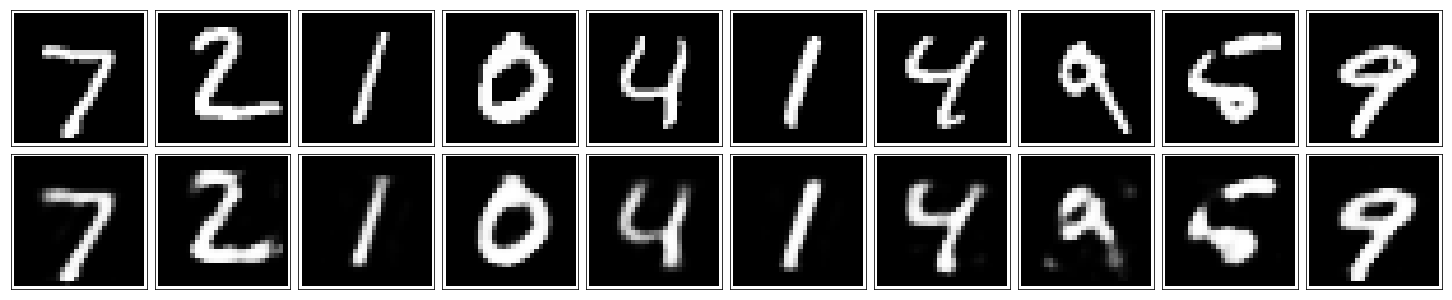

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [31]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.